# Imports

In [2]:
import time
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, cross_validate, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

# Data Frames

In [8]:
# Creating a data frame
df = pd.read_csv('thomascrc_data.txt', delimiter = '\t')
df
# Creating a list of the species in the microbiome
print(df.columns)
print('\n\n')

# Read specific columns
print(df['DiseaseStatus'])
print('\n\n')

# Read a specific row
print(df.iloc[0])

Index(['s__Enterobacter_cloacae', 's__Escherichia_coli',
       's__Bifidobacterium_bifidum', 's__Escherichia_unclassified',
       's__Bifidobacterium_longum', 's__Enterococcus_faecalis',
       's__Lactococcus_phage_936_sensu_lato', 's__Ruminococcus_gnavus',
       's__Bifidobacterium_breve', 's__Lactococcus_phage_P680',
       ...
       's__Aquabirnavirus_unclassified', 's__Prevotella_ruminicola',
       's__Eremococcus_coleocola', 's__Desulfotomaculum_ruminis',
       's__Diplodia_scrobiculata_RNA_virus_1',
       's__Methanobacterium_unclassified', 's__Clostridium_phage_phiCP7R',
       's__Porcine_stool_associated_circular_virus_2',
       's__Staphylococcus_vitulinus', 'DiseaseStatus'],
      dtype='object', length=831)



SID31004          1.0
SID31009          0.0
SID31021          0.0
SID31030          NaN
SID31071          0.0
                 ... 
MMPU29365221ST    0.0
MMPU68403337ST    0.0
MMPU72854103ST    0.0
MMPU84450604ST    0.0
MMPU99077057ST    0.0
Name: DiseaseStat

# Histograms

## For Individual Patients (Species are Unordered)

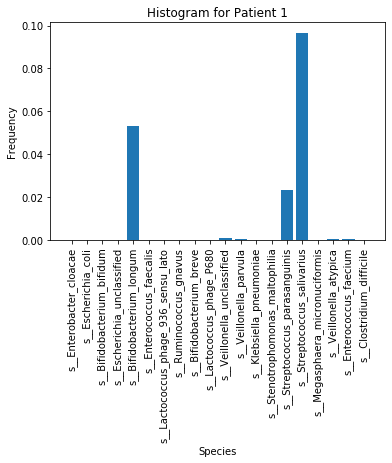

In [4]:
def patient_histogram(patient, num_elements, font_size):
    # The x coordinates of the histogram
    species_names = df.columns[0:num_elements]

    # The y coordinates of the histogram
    species_values = []
    for i in range(num_elements):
        species_values.append(df.iloc[patient][i])
    
    # Creating the histogram
    plt.bar(species_names, species_values)

    # Styling for the histogram
    plt.xlabel('Species')
    plt.xticks(rotation = 90)
    plt.xticks(fontsize = font_size)
    plt.ylabel('Frequency')
    plt.title('Histogram for Patient ' + str(patient + 1))

patient_histogram(0,20,10)

## Counting the Disease Status of All Patients

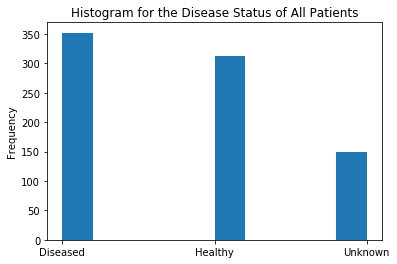

In [13]:
def diseasestatus_histogram():
    NUM_PATIENTS = 813
    # The x coordinates of the histogram
    health_values = []
    for i in range(813):
        value = df.iloc[i][830]
        health_status = ''
        # If the patient does not have a disease value, this histogram will identify it as 0.5
        if value == 1.0:
            health_value = 'Diseased'
        elif value == 0.0:
            health_value = 'Healthy'
        else:
            health_value = 'Unknown'
        health_values.append(health_value)
        
    # Creating the histogram
    plt.hist(health_values)

    # Styling for the histogram
    plt.xticks(fontsize = 10)
    plt.ylabel('Frequency')
    plt.title('Histogram for the Disease Status of All Patients')

diseasestatus_histogram()

## For Individual Patients (Displays the 20 Most Frequent Species)

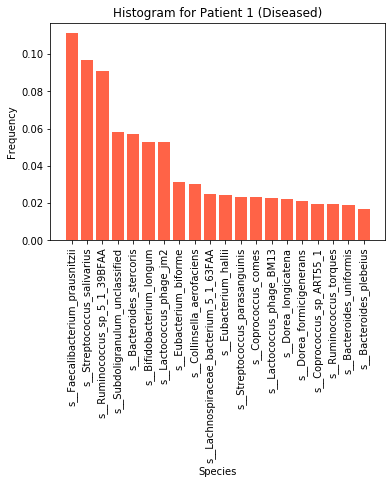

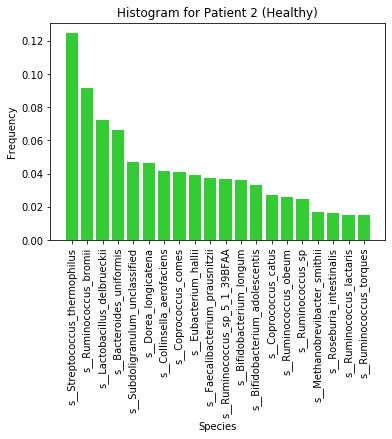

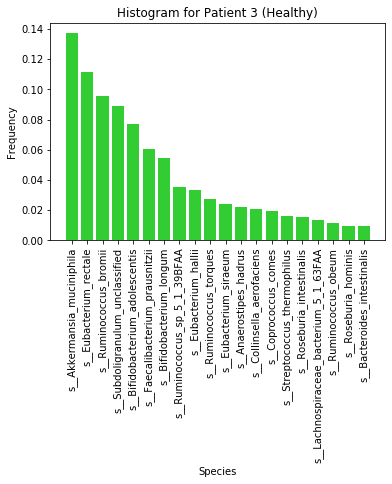

In [5]:
def sorted_patient_histogram(patient, num_elements, font_size):
    TOTAL_NUM_ELEMENTS = 830
    
    # The unsorted x coordinates of the histogram
    species_names = list(df.columns)
    
    # The unsorted y coordinates of the histogram
    species_values = []
    for i in range(TOTAL_NUM_ELEMENTS):
        species_values.append(df.iloc[patient][i])
    
    # Selection sort algorithm for the x and y coordinates
    names_indexes = [];
    for j in range(num_elements):
        max_value_index = j
        for k in range(j + 1, TOTAL_NUM_ELEMENTS):
            if species_values[k] > species_values[max_value_index]:
                max_value_index = k
        species_values[j], species_values[max_value_index] = species_values[max_value_index], species_values[j]
        species_names[j], species_names[max_value_index] = species_names[max_value_index], species_names[j]
        
    # Styling for the histogram
    plt.xlabel('Species')
    plt.xticks(rotation = 90)
    plt.xticks(fontsize = font_size)
    plt.ylabel('Frequency')
    health_status_string = 'Diseased'
    plt_color = 'Tomato'
    if df.iloc[patient][830] == 0.0:
        health_status_string = 'Healthy'
        plt_color = 'Limegreen'
    plt.title('Histogram for Patient ' + str(patient + 1) + ' (' + health_status_string + ')')
    
     # Plotting the histogram
    plt.bar(species_names[0:num_elements], species_values[0:num_elements], color = plt_color)
    plt.show()

sorted_patient_histogram(0,20,10)
sorted_patient_histogram(1,20,10)
sorted_patient_histogram(2,20,10)

# Random Forests

## Removing Patients with Unknown Disease Status from the Data

In [9]:
# Creating test and train datasets
df = df[df.DiseaseStatus >= 0.0]
target = np.array(list(df.DiseaseStatus))
data = df.drop(['DiseaseStatus'], axis = 'columns')

## A Model Without Cross Validation

In [7]:
model = RandomForestClassifier(n_estimators = 1000, max_depth = None)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [8]:
# Getting the model's accuracy
model.score(X_test, y_test)

0.7218045112781954

Text(-3.0, 0.5, 'Truth')

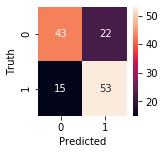

In [9]:
# Creating a confusion matrix to visualize the model's accuracy
y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize = (2, 2))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [10]:
# Getting the AUC of this non-cross validated model
model_fpr, model_tpr, threshold = roc_curve(y_test, y_predicted, pos_label = 1)
model_auc = auc(model_fpr, model_tpr)
model_auc

0.7204751131221718

## A Model with 10-Fold Cross Validation

In [22]:
start_time = time.time()
cv_model = RandomForestClassifier(n_estimators = 1000, max_features = 0.3, min_samples_leaf = 5)
scores = cross_val_score(cv_model, data, target, cv = 10, scoring = 'roc_auc')
print(scores.mean())
print("Time elapsed: " + str(time.time() - start_time) + " seconds")

0.7624833589349719
Time elapsed: 141.22901368141174 seconds


## Tuning the 10-Fold Cross Validated Model

In [12]:
start_time = time.time()
tuned_cv_model = RandomForestClassifier(n_estimators = 1000, n_jobs = -1)
grid_search_model = GridSearchCV(tuned_cv_model, {
    'max_depth': [10, 20, 30, 60, 90, None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'max_features' : [0.2, 0.3, 0.35, 0.9]
}, cv = 10, scoring = 'roc_auc', n_jobs = -1)

grid_search_model.fit(data, target)
grid_search_model.cv_results_
print("Time elapsed: " + str(time.time() - start_time) + " seconds")

Time elapsed: 9772.411500692368 seconds


results_df = pd.DataFrame(tuned_cv_model.cv_results_)
results_df[['param_n_estimators', 'max_features', 'min_samples_leaf']]

In [4]:
tuned_df = pd.DataFrame(grid_search_model.cv_results_)
tuned_df = tuned_df[['param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 'param_max_features', 'mean_test_score']]

NameError: name 'grid_search_model' is not defined

In [3]:
pd.set_option('display.max_rows', 1000)
tuned_df.sort_values(by = ['mean_test_score'], inplace = True, ascending = False)
tuned_df

NameError: name 'tuned_df' is not defined

## A Random Forest with the Study's Parameters

In [25]:
start_time = time.time()
cv_model2 = RandomForestClassifier(n_estimators = 1000, min_samples_leaf = 5, criterion = 'entropy', \
                                   max_depth = None, min_samples_split = 2, max_features = 0.3, n_jobs = -1)
scores = cross_val_score(cv_model2, data, target, cv = 10, scoring = 'roc_auc')
print(scores.mean())
print("Time elapsed: " + str(time.time() - start_time) + " seconds")

0.7615117767537123
Time elapsed: 231.35556197166443 seconds


## Plotting the ROC Curves

## Creating an ROC Curve Plotting Method

In [6]:
def plot_roc(model, model_name):
    start_time = time.time()
    kf = KFold(n_splits = 10) #stratified k fold 5 times

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    count = 1
    plt.figure(figsize=(10,10))

    for train_index, test_index in kf.split(data, target):
        # Getting train/test data and fitting the model to it
        X_train, X_test, y_train, y_test = data.iloc[train_index], data.iloc[test_index], target[train_index], target[test_index]
        model.fit(X_train, y_train)

        # Getting the ROC curve
        probs = model.predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
        roc_auc = auc(fpr, tpr)

        # Adding the tpr, fpr, and auc to the overall lists
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        aucs.append(roc_auc)

        # Plotting the ROC curve for this fold
        plt.plot(fpr, tpr, label = 'Fold ' + str(count) + ' (AUC = ' + str(roc_auc) + ')')
        count += 1

    # Calculating the mean results
    mean_tpr = np.mean(tprs, axis = 0)
    mean_auc = auc(mean_fpr, mean_tpr)

    # Plotting the random ROC and mean ROC and styling
    plt.plot([0,1], [0,1], linestyle = '--', lw = 2, color = 'gray', label = 'Random Prediction (AUC = 0.5)')
    plt.plot(mean_fpr, mean_tpr, color = 'black', label = 'Mean ROC (AUC = ' + str(mean_auc) + ')')
    plt.title('ROC Curve For ' + model_name)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    print("Time elapsed: " + str(time.time() - start_time) + " seconds")

In [16]:
def five_trials_plot_roc(model, model_name):
    start_time = time.time()
    plt.figure(figsize=(10,10))
    total_tprs = []
    total_aucs = []
    total_mean_fpr = np.linspace(0, 1, 100)
    
    for i in range(5):
        kf = KFold(n_splits = 10)
        
        tprs = []
        aucs = []
        mean_fpr = np.linspace(0, 1, 100)

        for train_index, test_index in kf.split(data, target):
            # Getting train/test data and fitting the model to it
            X_train, X_test, y_train, y_test = data.iloc[train_index], data.iloc[test_index], target[train_index], target[test_index]
            model.fit(X_train, y_train)

            # Getting the ROC curve
            probs = model.predict_proba(X_test)
            fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
            roc_auc = auc(fpr, tpr)

            # Adding the tpr, fpr, and auc to the overall lists
            tprs.append(np.interp(mean_fpr, fpr, tpr))
            aucs.append(roc_auc)

        # Calculating the mean results
        mean_tpr = np.mean(tprs, axis = 0)
        mean_auc = auc(mean_fpr, mean_tpr)
        
        # Adding to the even overall mean lists
        total_tprs.append(np.interp(total_mean_fpr, mean_fpr, mean_tpr))
        total_aucs.append(mean_auc)
        
        # Plotting the mean ROC
        plt.plot(mean_fpr, mean_tpr, label = 'Trial ' + str(i+1) + ' (AUC = ' + str(mean_auc) + ')')


    # Calculating the overall mean results
    total_mean_tpr = np.mean(total_tprs, axis = 0)
    total_mean_auc = auc(total_mean_fpr, total_mean_tpr)
        
    # Plotting the overall mean ROC and random ROC
    plt.plot([0,1], [0,1], linestyle = '--', lw = 2, color = 'gray', label = 'Random Prediction (AUC = 0.5)')
    plt.plot(total_mean_fpr, total_mean_tpr, color = 'black', label = 'Mean ROC (AUC = ' + str(total_mean_auc) + ')')
    
    # Styling
    plt.title('ROC Curve For ' + model_name)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    print("Time elapsed: " + str(time.time() - start_time) + " seconds")

### Our Best Model

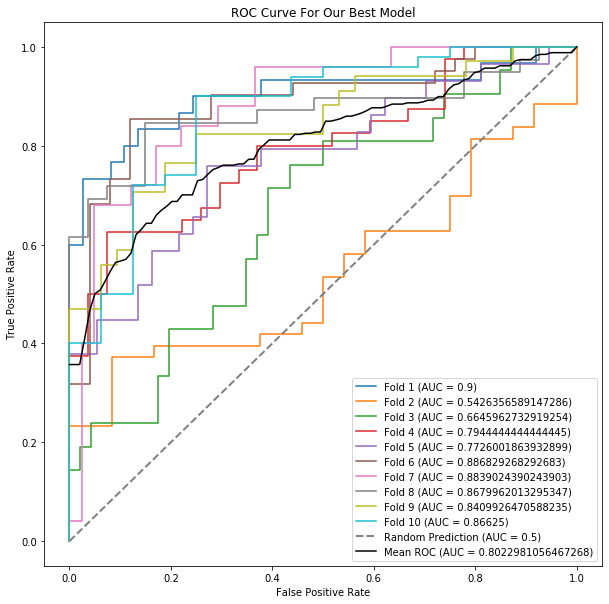

Time elapsed: 56.6460177898407 seconds


In [47]:
best_model = RandomForestClassifier(n_estimators = 1000, min_samples_leaf = 1, \
                                   max_depth = 10, min_samples_split = 2, max_features = 0.3, n_jobs = -1)
plot_roc(best_model, 'Our Best Model')

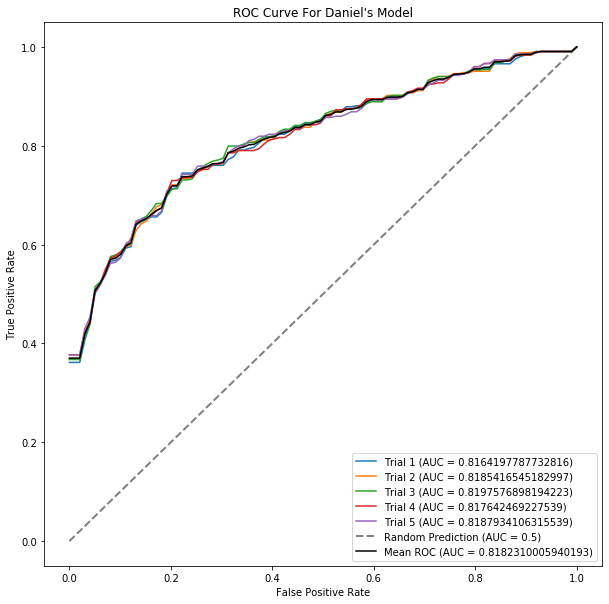

Time elapsed: 212.2277889251709 seconds


In [17]:
model = RandomForestClassifier(max_depth=50, max_features=50, min_samples_leaf=10, min_samples_split=100, n_estimators=2000)

five_trials_plot_roc(model, 'Daniel\'s Model')

### The Study's Model

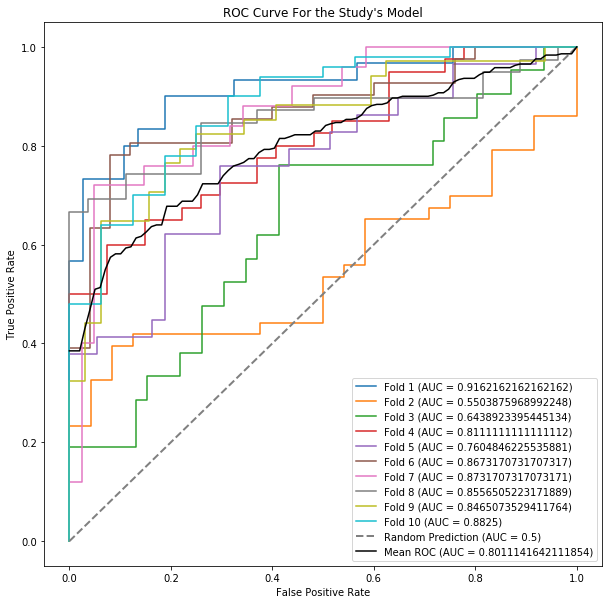

Time elapsed: 74.27805995941162 seconds


In [48]:
study_model = RandomForestClassifier(n_estimators = 1000, min_samples_leaf = 5, criterion = 'entropy', \
                                   max_depth = None, min_samples_split = 2, max_features = 0.3, n_jobs = -1)
plot_roc(study_model, 'the Study\'s Model')